Wine Unsupervised ML project

In [374]:
### import Liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [375]:
## Load dataset
dfW = pd.read_csv("winequality-white.csv")
dfW.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [376]:
## Load dataset
dfR = pd.read_csv("winequality-red.csv")
dfR.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [377]:
## Explore data
## Check for any missing data 
dfW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [378]:
## Check for any missing data 
dfR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


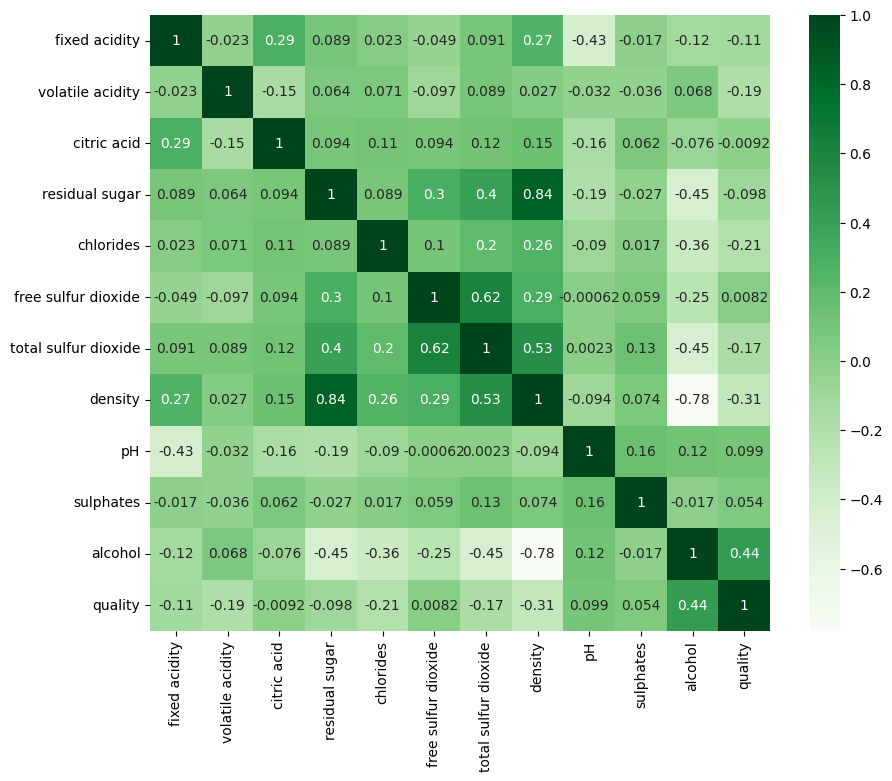

In [379]:
## Plot heatmap to understand the relationship between variables for white wine.
plt.figure(figsize=(10,8))
hm = sns.heatmap(dfW.corr(),cmap='Greens', annot=True)

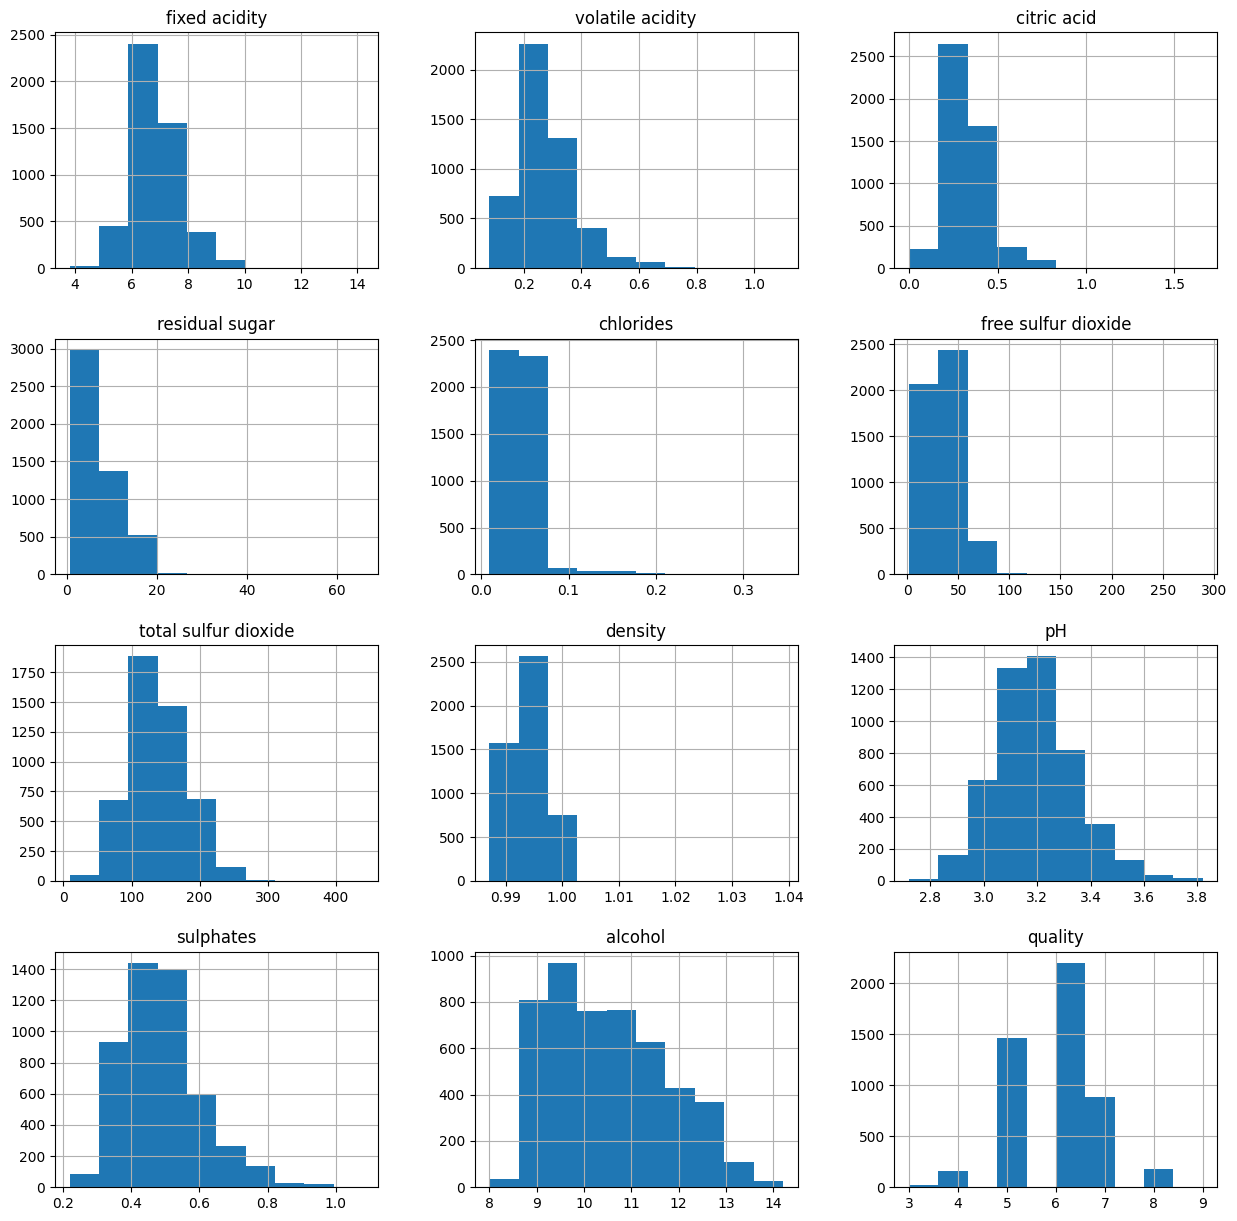

In [380]:
## plot an histogram to explore the relationship between variables
dfW.hist(bins = 10, figsize = (15,15))
plt.show()

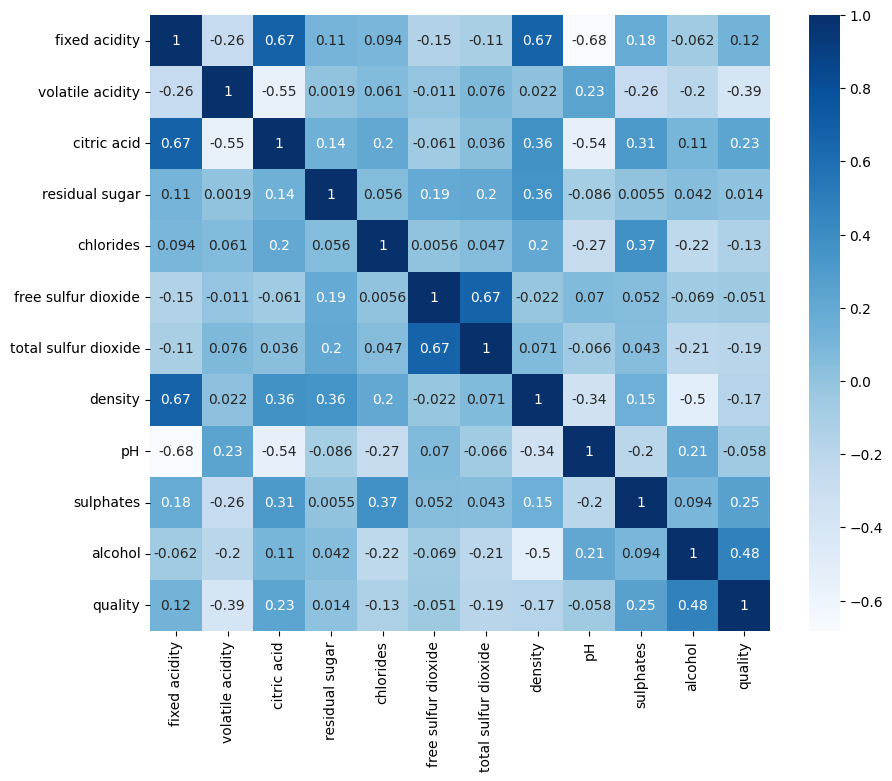

In [381]:
## Plot heatmap to understand the relationship between variables for Red wine.
plt.figure(figsize=(10,8))
hm = sns.heatmap(dfR.corr(),cmap='Blues', annot=True)

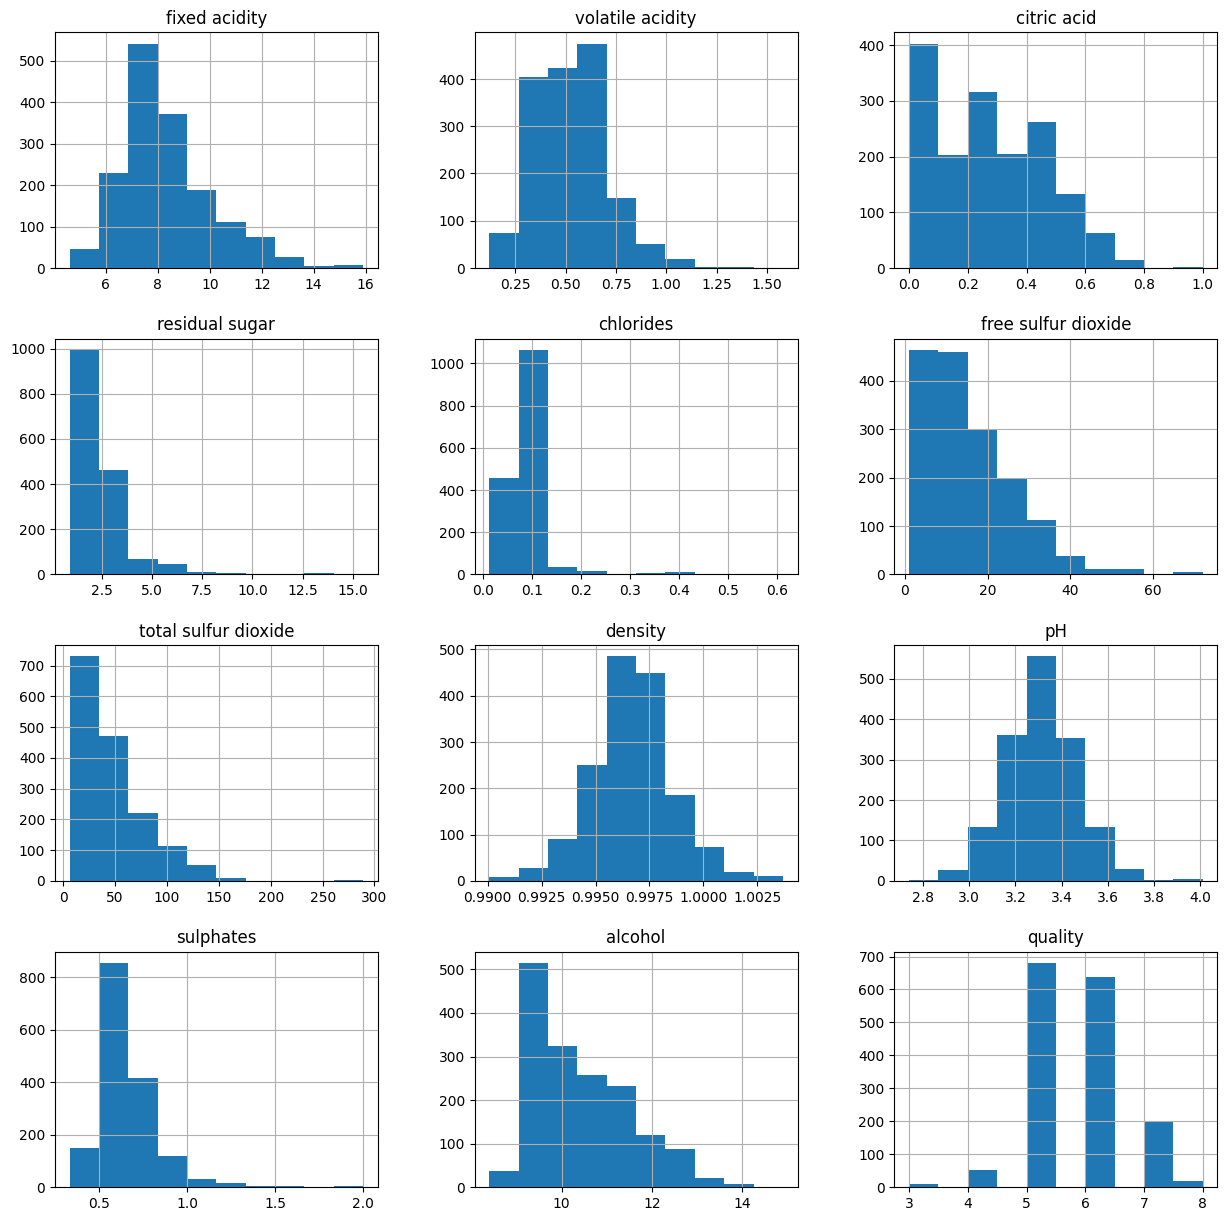

In [382]:
## plot an histogram to explore the relationship between variables for red wine
dfR.hist(bins = 10, figsize = (15,15))
plt.show()

[Text(0.5, 1.0, 'White wine specification')]

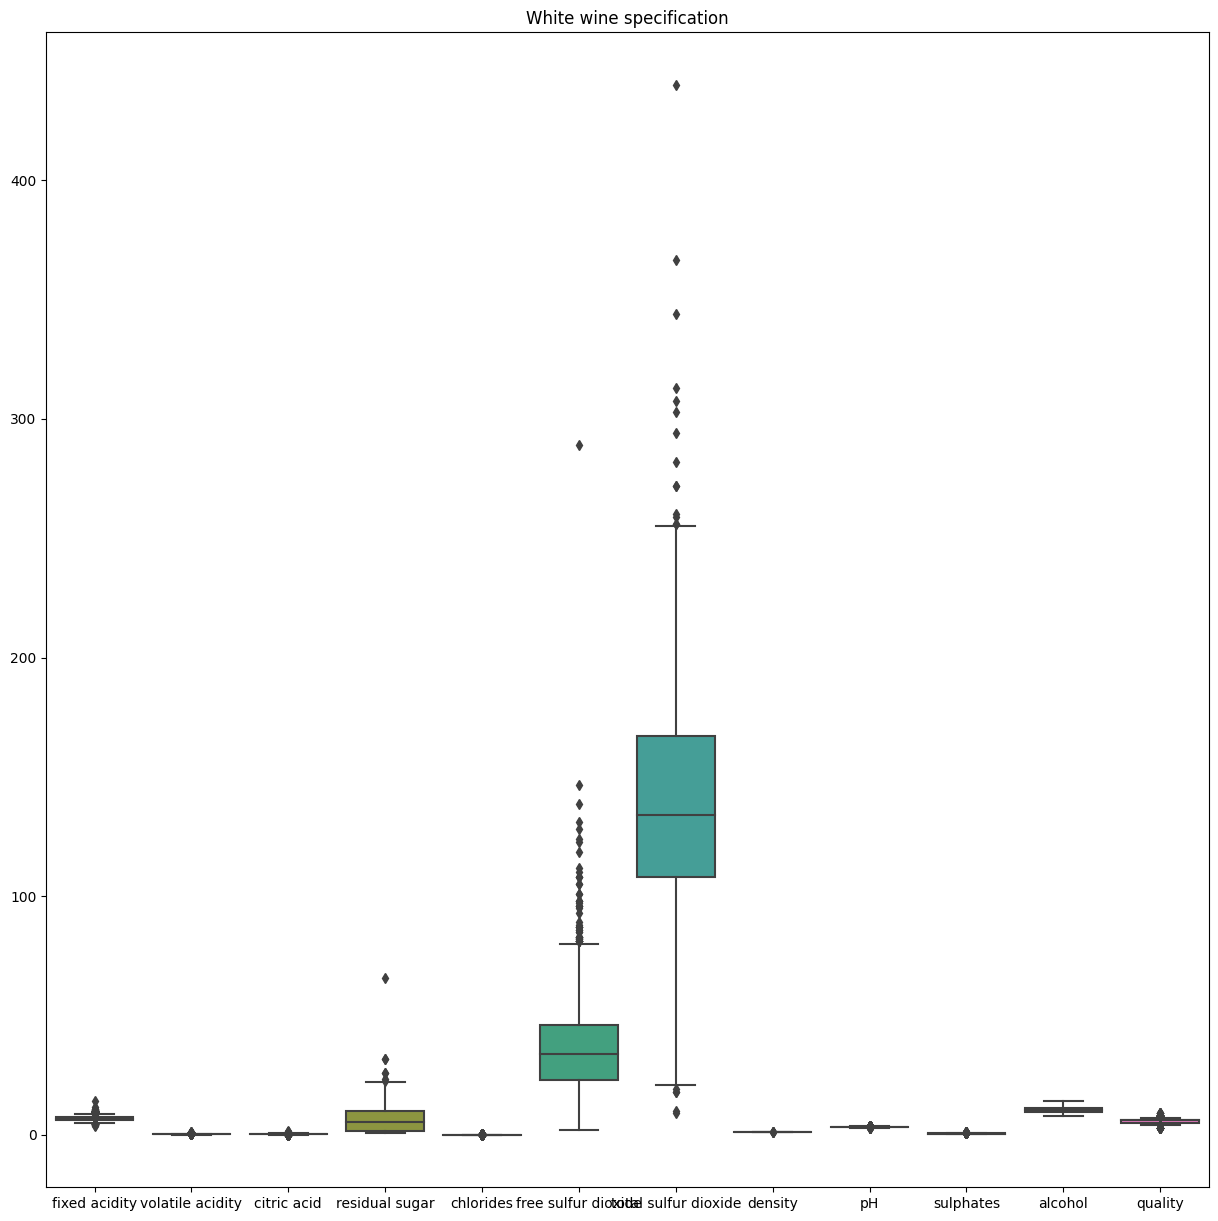

In [383]:
plt.figure(figsize=(15,15))
sns.boxplot(data=dfW, palette='husl').set(title='White wine specification')

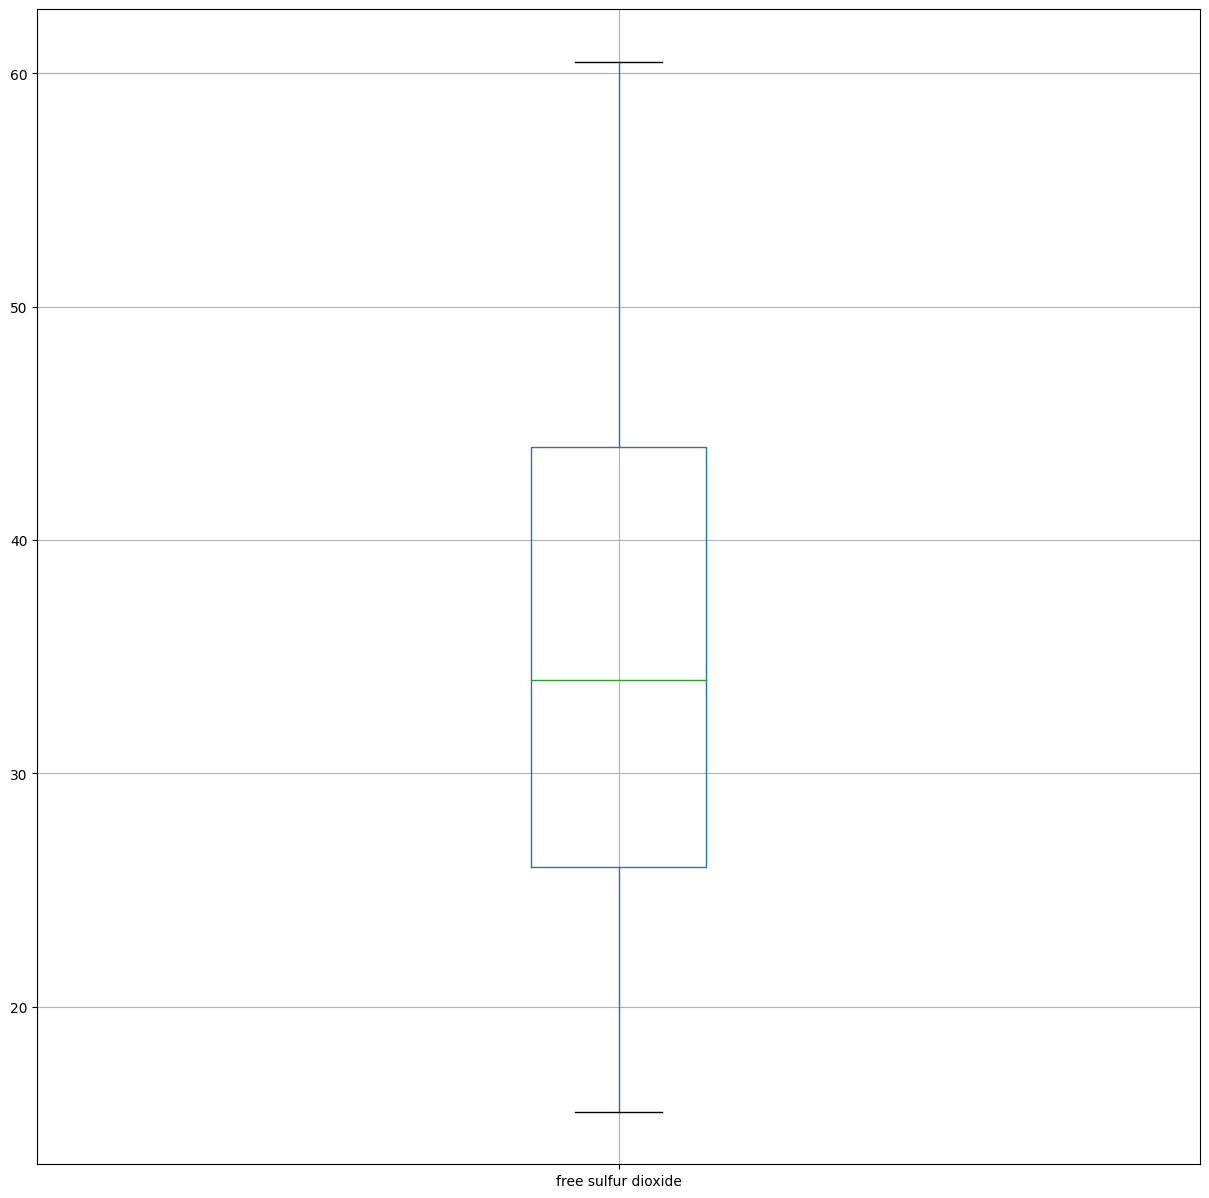

In [384]:
### Remove some outliers

max_threshold, min_threshold = dfW['free sulfur dioxide'].quantile([0.93,0.1])
dfw_new = dfW[(dfW['free sulfur dioxide']> min_threshold)&(dfW['free sulfur dioxide']< max_threshold)]
dfw_new.boxplot('free sulfur dioxide', figsize=(15,15))
plt.show()

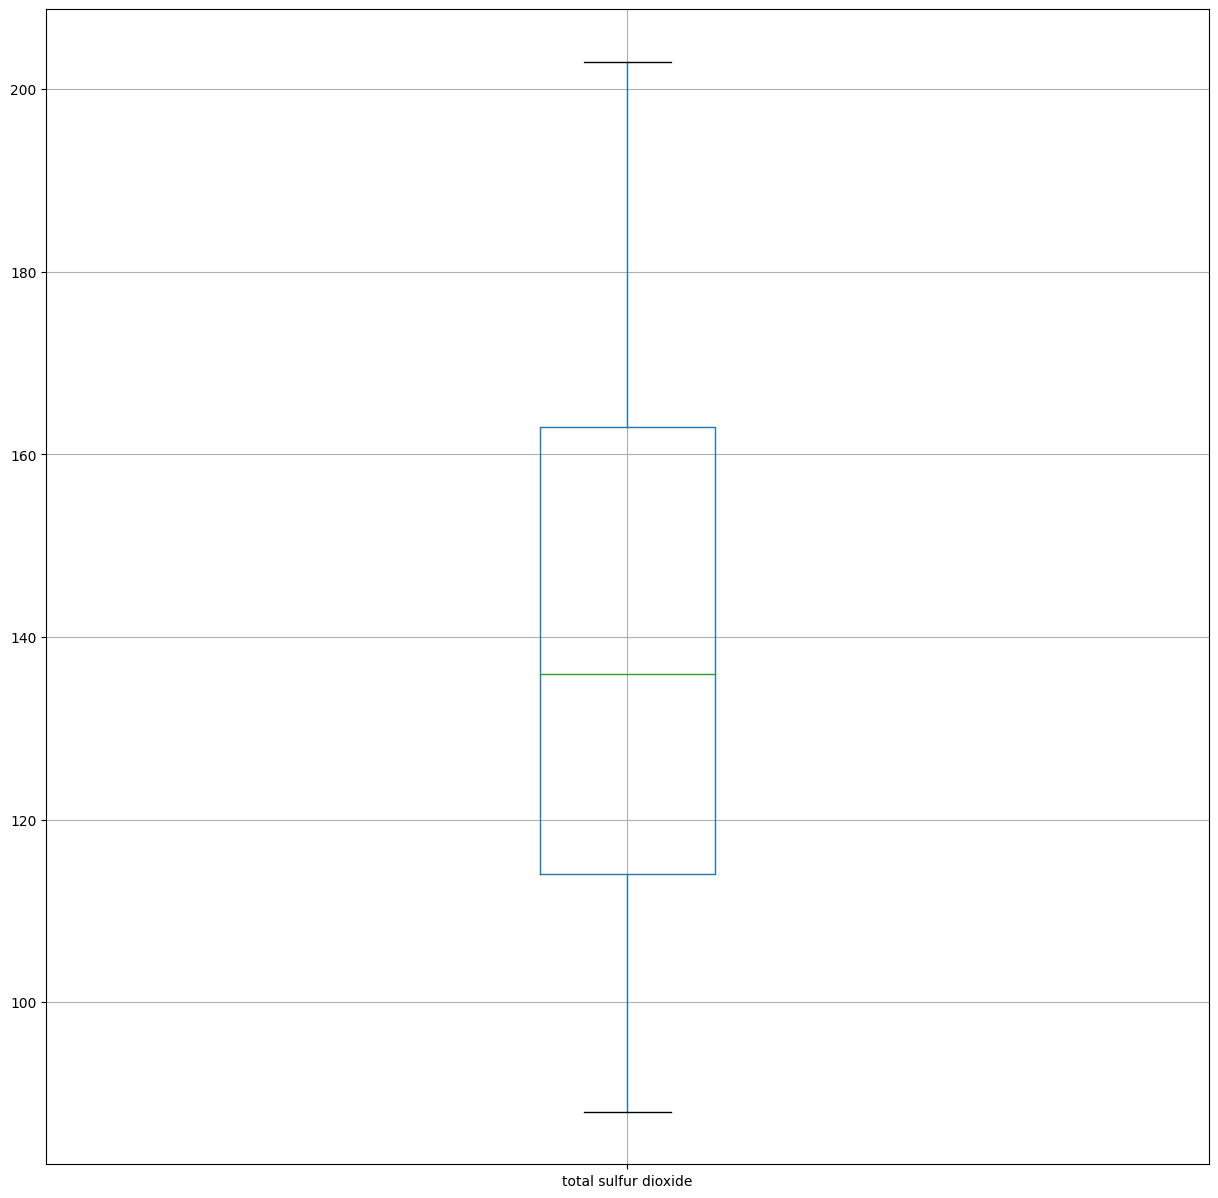

In [385]:
max_threshold, min_threshold = dfW['total sulfur dioxide'].quantile([0.93,0.1])
dfw_new = dfW[(dfW['total sulfur dioxide']> min_threshold)&(dfW['total sulfur dioxide']< max_threshold)]
dfw_new.boxplot('total sulfur dioxide', figsize=(15,15))
plt.show()

[Text(0.5, 1.0, 'Red wine specification')]

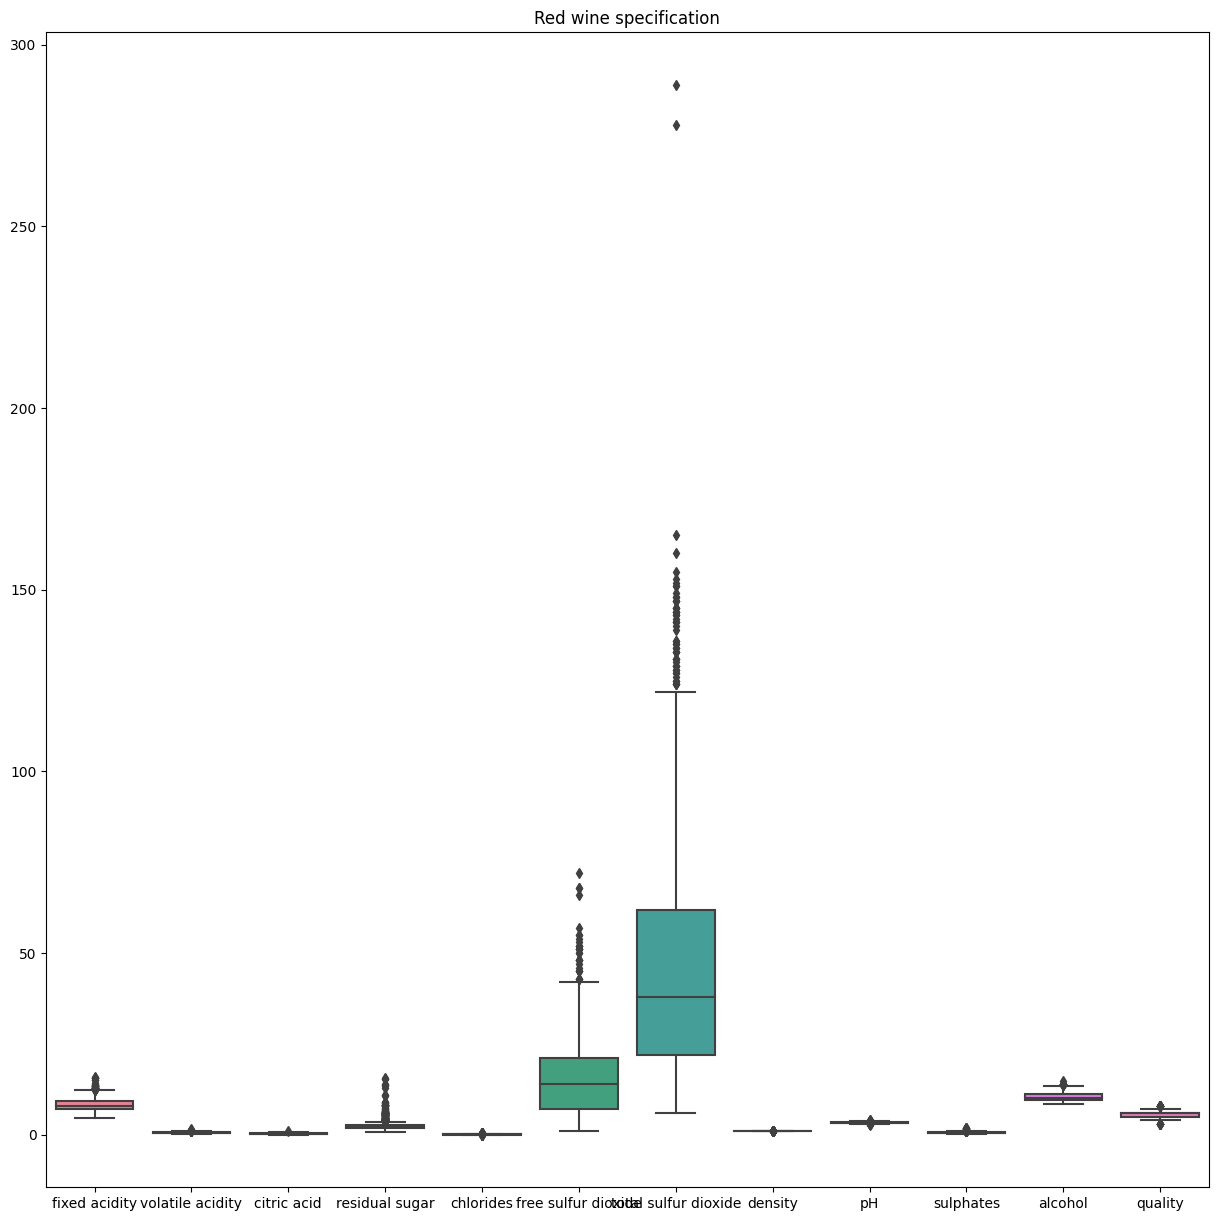

In [386]:
plt.figure(figsize=(15,15))
sns.boxplot(data=dfR , palette='husl').set(title='Red wine specification')

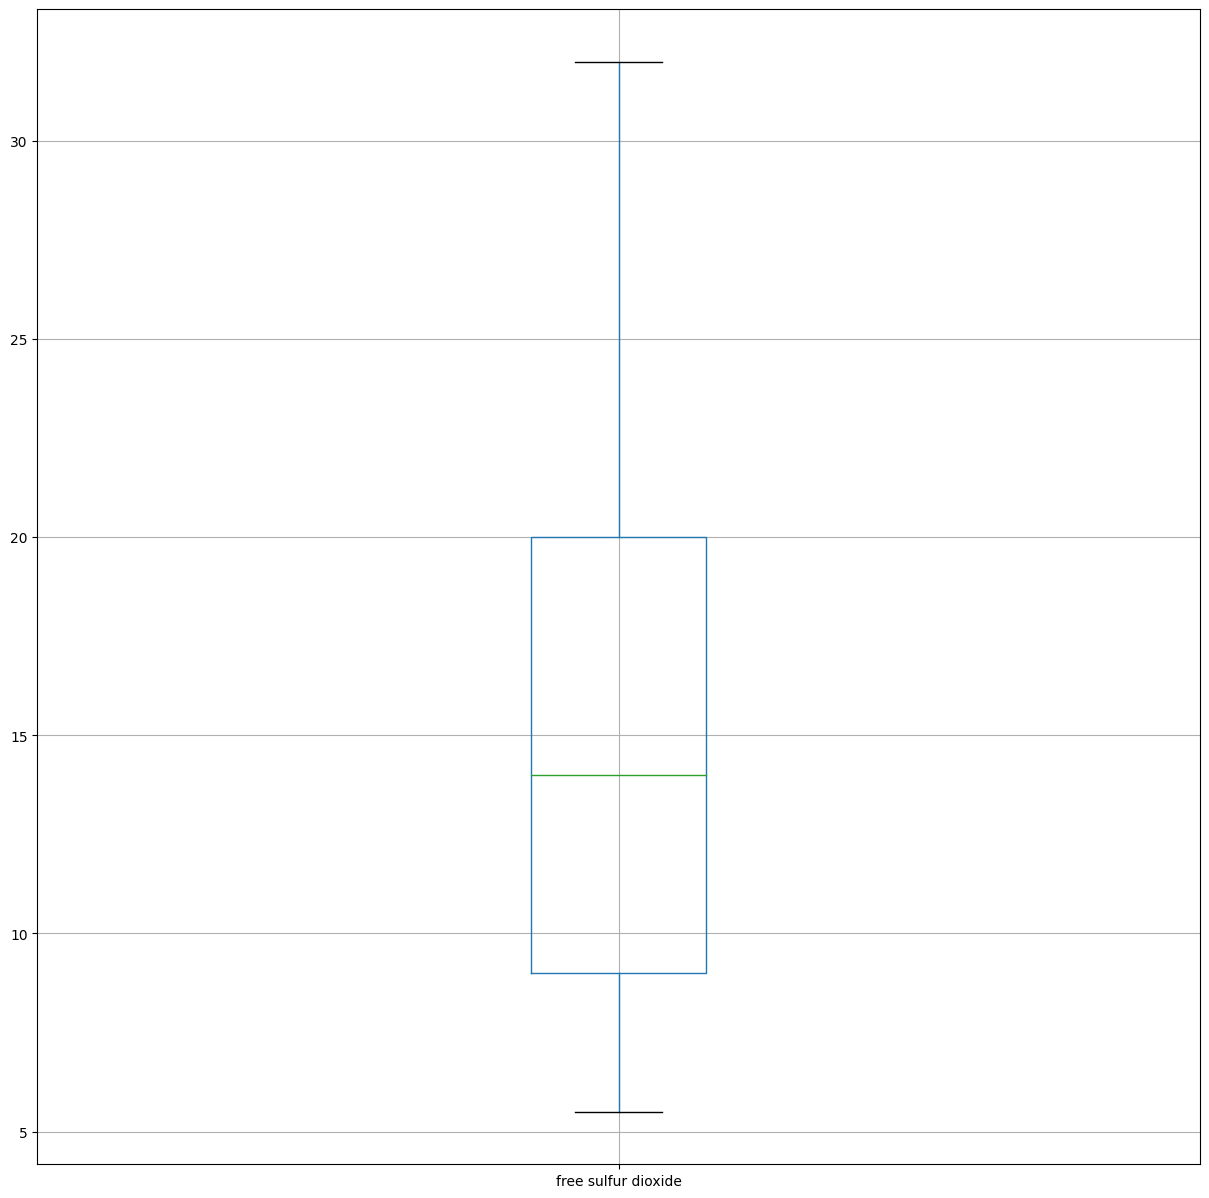

In [387]:
### Remove some outliers

max_threshold, min_threshold = dfR['free sulfur dioxide'].quantile([0.93,0.1])
dfr_new = dfR[(dfR['free sulfur dioxide']> min_threshold)&(dfR['free sulfur dioxide']< max_threshold)]
dfr_new.boxplot('free sulfur dioxide', figsize=(15,15))
plt.show()

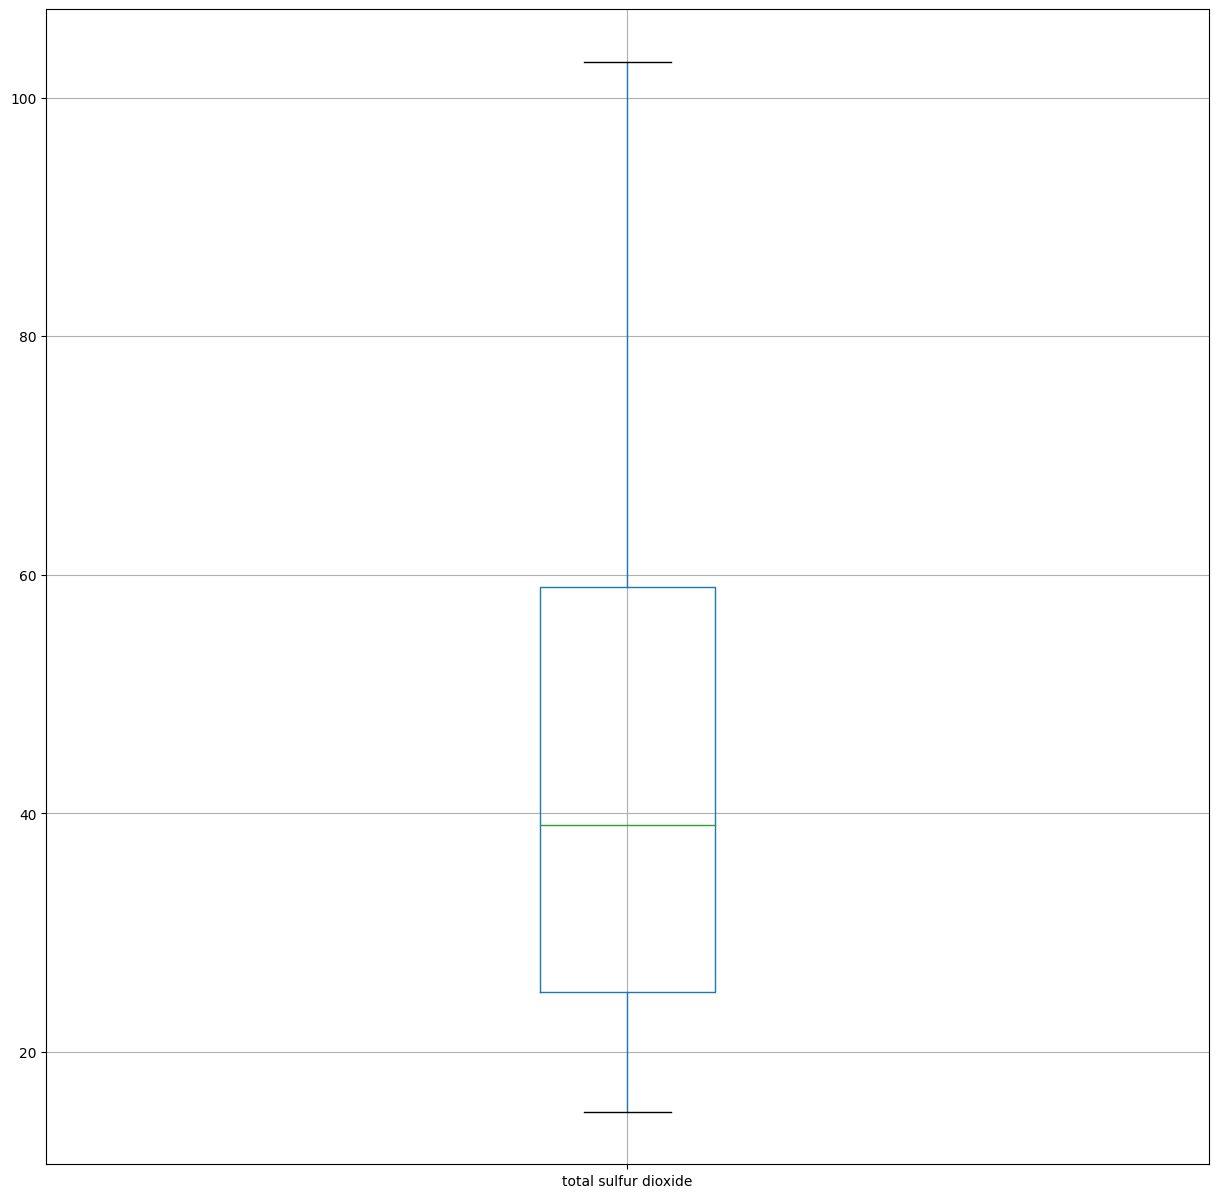

In [388]:
max_threshold, min_threshold = dfR['total sulfur dioxide'].quantile([0.93,0.1])
dfr_new = dfR[(dfR['total sulfur dioxide']> min_threshold)&(dfR['total sulfur dioxide']< max_threshold)]
dfr_new.boxplot('total sulfur dioxide', figsize=(15,15))
plt.show()

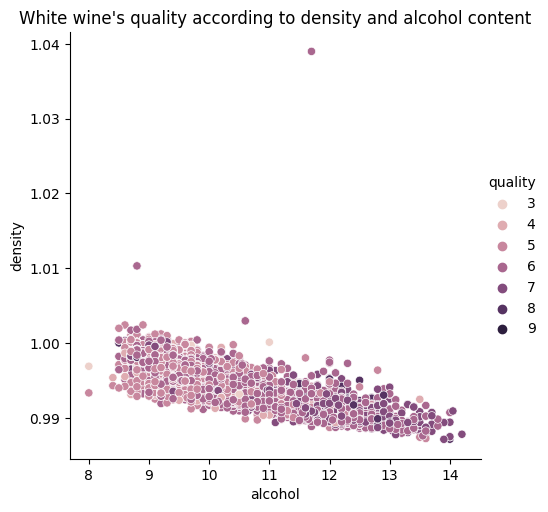

In [389]:
## Scatter plot show the relationship between quality of white wine, density and alcohol
sns.relplot( data=dfW, x="alcohol", y="density",
    hue="quality").set(title="White wine's quality according to density and alcohol content")


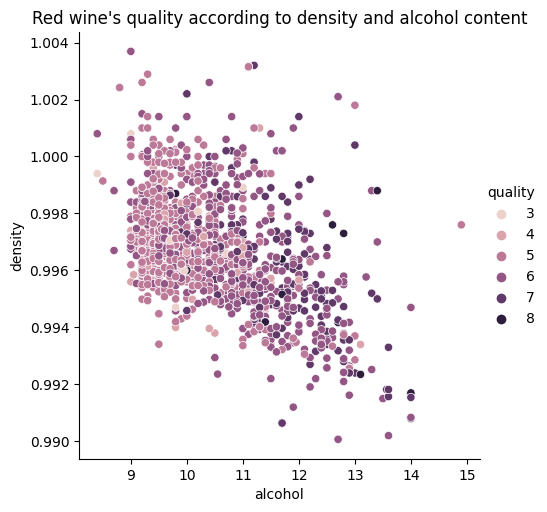

In [390]:
## Scatter plot show the relationship between quality of red wine, density and alcohol
sns.relplot( data=dfR, x="alcohol", y="density",
    hue="quality").set(title="Red wine's quality according to density and alcohol content")

In [391]:
# ### Merge both data sets and create new variable
# dfr_new['color']=1
# dfw_new['color']=0
# wines = pd.concat([dfw_new,dfr_new])


In [392]:
#Checking for duplicates
print("Number of duplicates in red wine: "+ str(np.sum(np.array(dfr_new.duplicated()))))
print("Number of duplicates in white wine:  "+ str(np.sum(np.array(dfw_new.duplicated()))))

Number of duplicates in red wine: 205
Number of duplicates in white wine:  797


In [393]:
# Combining the red and white wine data
wines = dfr_new.append(dfw_new)
print(wines.shape)

(5339, 12)


/var/folders/wz/fr6fh3zj7pv4nntlp9gbztzw0000gn/T/ipykernel_3314/2155701581.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wines = dfr_new.append(dfw_new)


In [394]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5339 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5339 non-null   float64
 1   volatile acidity      5339 non-null   float64
 2   citric acid           5339 non-null   float64
 3   residual sugar        5339 non-null   float64
 4   chlorides             5339 non-null   float64
 5   free sulfur dioxide   5339 non-null   float64
 6   total sulfur dioxide  5339 non-null   float64
 7   density               5339 non-null   float64
 8   pH                    5339 non-null   float64
 9   sulphates             5339 non-null   float64
 10  alcohol               5339 non-null   float64
 11  quality               5339 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 542.2 KB


In [395]:
## Select variables (X,Y)
X = wines.iloc[:,1:]
Y = wines['quality']

In [396]:
## Data preprocessing

## Apply standard scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wines = scaler.fit_transform(wines)
data_scaled = scaler.fit_transform(wines)

In [397]:
#Using dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(2)
wines2 = pca.fit_transform(wines)

<AxesSubplot:>

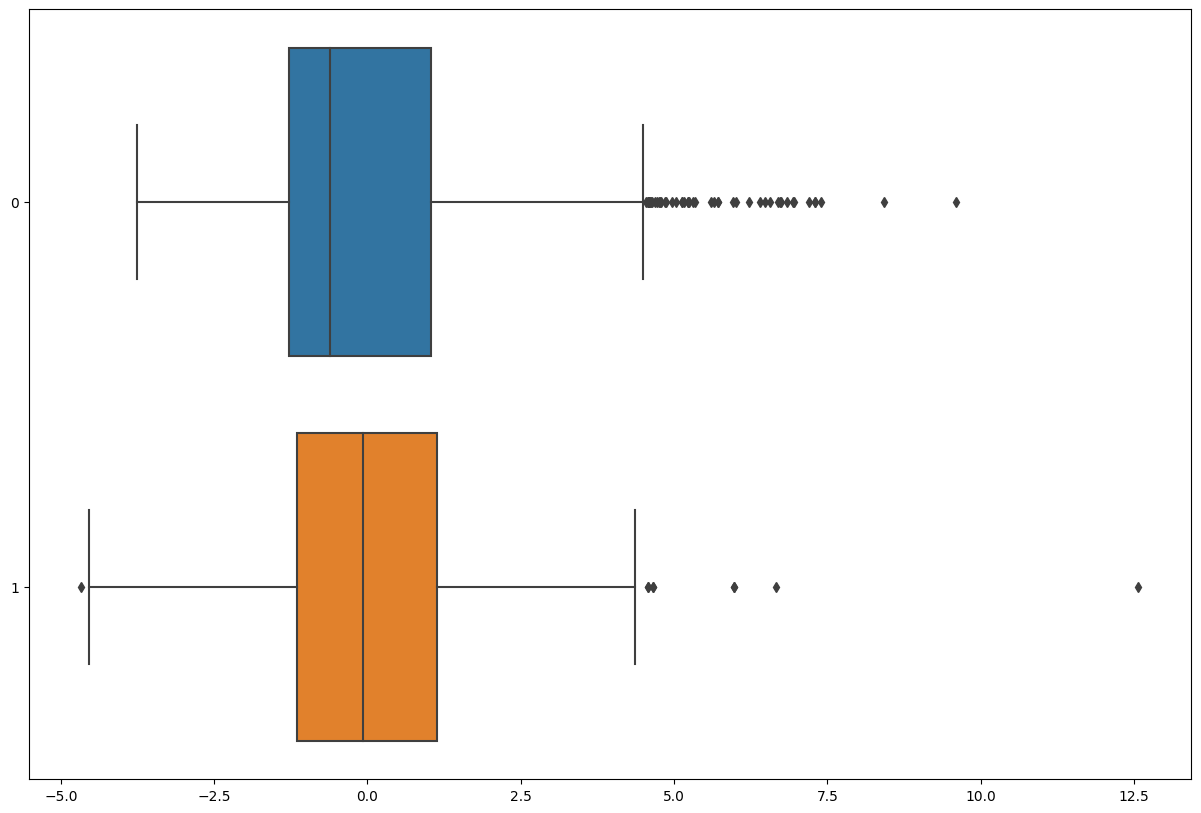

In [398]:
plt.figure(figsize=(15,10))
sns.boxplot(data= wines2, orient='horizontal')

In [399]:
### train, test, split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 101)

In [400]:
### unsupervised ML Liberaries

from sklearn.cluster import k_means
from sklearn.neural_network import MLPClassifier
from sklearn import metrics


In [401]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.261970,-2.185011,-0.750957,0.549914,-1.232987,-1.644924,1.026895,1.785074,0.187770,-0.909847,-0.999646
1,3.380225,-2.185011,-0.604792,1.167043,-0.372900,-0.982938,0.690563,-0.139341,1.002264,-0.572456,-0.999646
2,2.634722,-1.910808,-0.667434,0.998735,-0.987248,-1.243720,0.757829,0.233126,0.798641,-0.572456,-0.999646
3,-0.347292,1.653835,-0.750957,0.521863,-0.864378,-1.123359,1.094161,-0.387653,0.323519,-0.572456,0.167191
4,2.261970,-2.185011,-0.750957,0.549914,-1.232987,-1.644924,1.026895,1.785074,0.187770,-0.909847,-0.999646
...,...,...,...,...,...,...,...,...,...,...,...
5334,-0.782169,-0.197037,-0.813599,-0.487985,-0.434335,-0.481433,-1.213075,0.295204,-0.219477,0.608414,0.167191
5335,-0.098791,0.282819,0.522767,-0.263574,1.593011,1.043141,0.051532,-0.449730,-0.490975,-0.741151,-0.999646
5336,-0.595793,-0.882545,-0.897121,-0.431882,-0.065727,-0.100290,-0.742211,-1.442977,-0.490975,-0.909847,0.167191
5337,-0.285167,-0.128486,-0.918002,-0.964857,-0.680074,-0.120350,-2.037088,0.729750,-1.033971,1.957979,1.334027


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

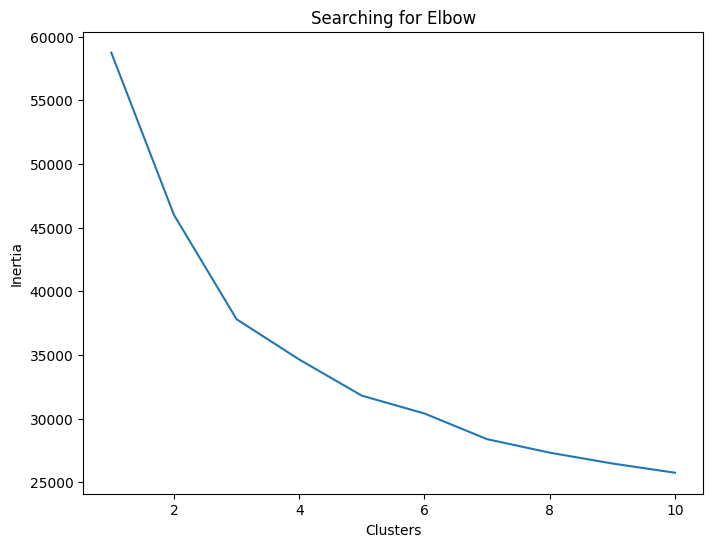

In [402]:
from sklearn.cluster import KMeans
inertias = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X_scaled)
    inertias.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=list(range(1, 11)), y=inertias, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

In [403]:
from sklearn import metrics
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(wines2)


In [404]:
kmeans = KMeans(n_clusters=3, n_init=15)
kmeans.fit(wines2)
print("WCSS: ", kmeans.inertia_)
print("Iternations until converged: ", kmeans.n_iter_)
print("Final centroids: ")
print(kmeans.cluster_centers_)
print("Cluster model ")
print(kmeans.labels_)

WCSS:  9074.086038965404
Iternations until converged:  5
Final centroids: 
[[-1.07300849  1.55866971]
 [ 2.79040108  0.0753728 ]
 [-0.79795216 -1.27399656]]
Cluster model 
[1 1 1 ... 2 2 2]


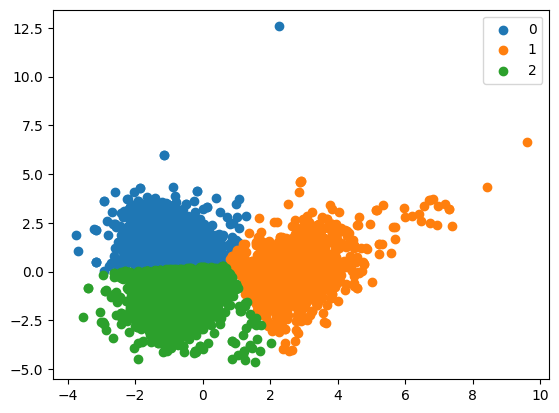

In [405]:
## Getting unique labels
 
Unique_labels = np.unique(kmeans.labels_)
 
#plotting the results:
 
for i in Unique_labels:
    plt.scatter(wines2[kmeans.labels_ == i , 0] , wines2[kmeans.labels_ == i , 1] , label = i)
plt.legend()
plt.show()